# Titanic Dataset Analysis

这个notebook用于探索和分析Titanic数据集。我们将：
1. 加载并查看数据
2. 进行基本的数据探索
3. 分析特征之间的关系
4. 进行数据可视化

In [2]:
print('Hello, World!')
import seaborn as sns

Hello, World!


In [3]:
# 导入需要的库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 设置显示选项
pd.set_option('display.max_columns', None)
plt.style.use('seaborn')
%matplotlib inline

C:\Users\Administrator\AppData\Local\Temp\ipykernel_34732\1230710034.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [8]:
# 读取数据
train_data = pd.read_csv('data/train.csv')
test_data = pd.read_csv('data/test.csv')

# 显示训练集的基本信息
print('Training Data Shape:', train_data.shape)
train_data.head()

Training Data Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# 查看数据基本信息
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
# 查看数值型特征的统计描述
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# 检查缺失值
missing_values = train_data.isnull().sum()
missing_percentages = (missing_values / len(train_data)) * 100

missing_df = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentages
})

print('\nMissing Values Analysis:')
print(missing_df[missing_df['Missing Values'] > 0])


Missing Values Analysis:
          Missing Values  Percentage
Age                  177   19.865320
Cabin                687   77.104377
Embarked               2    0.224467


Overall survival rate: 38.38%

Survival rate by sex:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64


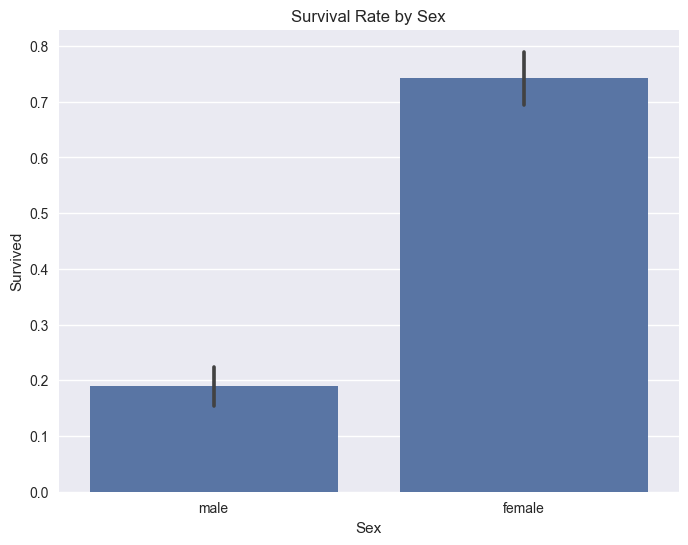

In [9]:
# 存活率分析
survival_rate = train_data['Survived'].mean() * 100
print(f'Overall survival rate: {survival_rate:.2f}%')

# 按性别统计存活率
survival_by_sex = train_data.groupby('Sex')['Survived'].mean() * 100
print('\nSurvival rate by sex:')
print(survival_by_sex)

# 可视化性别与存活率的关系
plt.figure(figsize=(8, 6))
sns.barplot(x='Sex', y='Survived', data=train_data)
plt.title('Survival Rate by Sex')
plt.show()

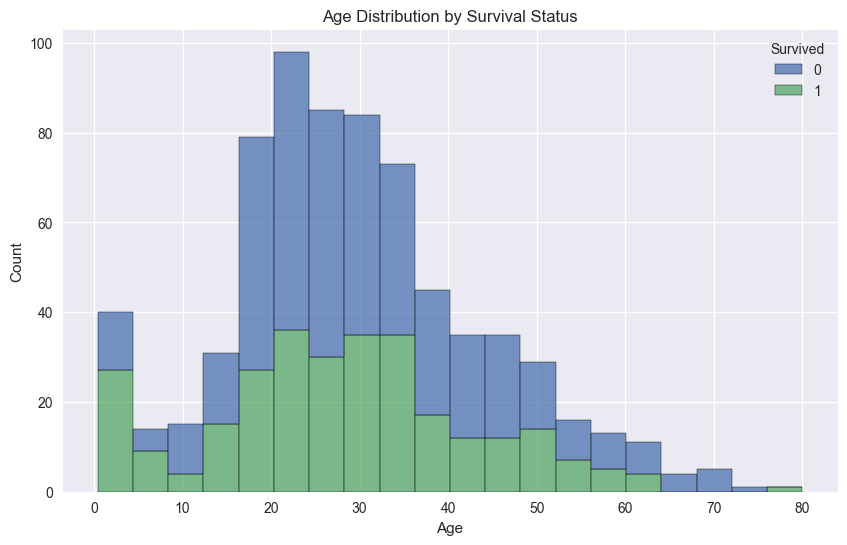

In [10]:
# 年龄分布分析
plt.figure(figsize=(10, 6))
sns.histplot(data=train_data, x='Age', hue='Survived', multiple="stack")
plt.title('Age Distribution by Survival Status')
plt.show()

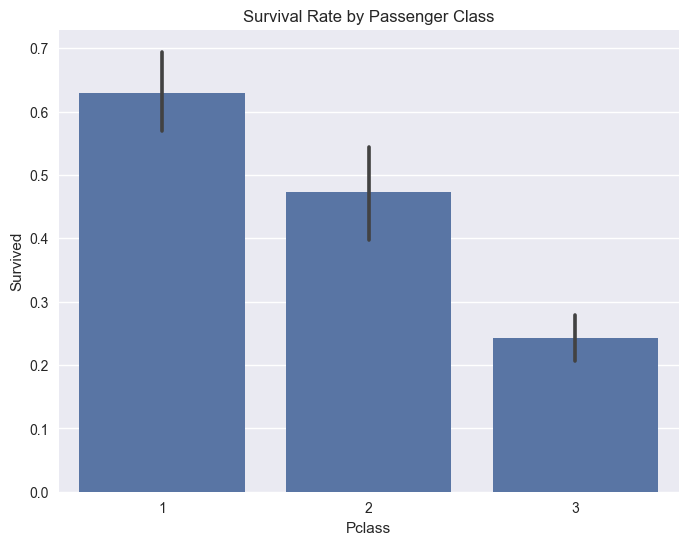

In [11]:
# 船票等级与存活率关系
plt.figure(figsize=(8, 6))
sns.barplot(x='Pclass', y='Survived', data=train_data)
plt.title('Survival Rate by Passenger Class')
plt.show()